<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="http://cocl.us/DA0101EN_NotbookLink_Top">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/TopAd.png" width="750" align="center">
    </a>
</div>

<a href="https://www.bigdatauniversity.com"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/CCLog.png" width=300, align="center"></a>

<h1 align=center><font size=5>Data Analysis with Python</font></h1>

<h1>Module 5: Model Evaluation and Refinement</h1>

We have built models and made predictions of vehicle prices. Now we will determine how accurate these predictions are. 

<h1>Table of content</h1>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>

This dataset was hosted on IBM Cloud object click <a href="https://cocl.us/cognitive_class_DA0101EN_objectstorage">HERE</a> for free storage.

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

 First lets only use numeric data 

In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


 Libraries for plotting 

In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<h2>Functions for plotting</h2>

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

# Consecuences of using lot or few both train and test data  

Using a lot of data for training gives us an accurate means of determining how our model
will perform in the real world, but the precision of the performance will be low.  
Repeating the process, we get good approximation of the generalization
error, but the precision is poor .i.e., all the results are extremely different from one
another.  

If we use fewer data points to train the model and more to test the model, the accuracy of
the generalization performance will be less, but the model will have good precision.  
The figure above demonstrates this; all our error estimates are relatively close together,
but they are further away from the true generalization performance.  

To overcome this problem, we use cross validation.

In [8]:
y_data = df['price']

drop price data in x data

In [9]:
x_data=df.drop('price',axis=1)

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train_1" , "x_test_1", "y_train_1" and  "y_test_1".</b>
</div>

In [11]:
# Write your code below and press Shift+Enter to execute 
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, train_size=.6, random_state=0)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

-->

Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.

In [12]:
from sklearn.linear_model import LinearRegression

 We create a Linear Regression object:

In [13]:
lre=LinearRegression()

we fit the model using the feature horsepower 

In [14]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's Calculate the R^2 on the test data:

In [15]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

we can see the R^2 is much smaller using the test data.

In [16]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 90% of the data for training data
</b>
</div>

In [17]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.695897656301621

Double-click <b>here</b> for the solution.

<!-- The answer is below:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

-->

 Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation. 

#  Cross-Validation  


### https://scikit-learn.org/stable/modules/cross_validation.html#  

### https://www.youtube.com/watch?v=fSytzGwwBVw&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=2

<h2>Cross-validation Score</h2>  

https://scikit-learn.org/stable/modules/cross_validation.html

in- sample (train data)  

In this method, the dataset is split into k-equal groups; each group is referred to
as a fold.  
For example 4 folds.
Some of the folds can be used as a training set, which we use to train the model, and
the remaining parts are used as a test set, which we use to test the model.
For example, we can use three folds for training; then use one fold for testing.
This is repeated until each partition is used for both training and testing.
At the end, we use the average results as the estimate of out-of-sample (Test or validate data) error.
The evaluation metric depends on the model.

When to use each of the above technique?  
Kfold, LeaveOneOut  
If we have enough data and it is likely to get similar scores and optimal model’s parameters for different splits, train/test split is a good option. If on the contrary, scores & optimal parameters differ for different splits we can choose KFold approach while if we have too little data we can apply leave-one-out. Stratification helps to make validation more stable and it is especially useful for small and unbalanced dataset.  

In kFold how many folds to use?  
As the number of folds increasing the error due the bias decreasing but increasing the error due to variance; the computational price would go up too. Obviously, you need more time to compute it and you would need more memory. 
With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It’s would also computationally cheaper.  

General advice for big dataset usually k = 3 or k = 5 is a preferred option while in small datasets it is recommended to use Leave one out.     

The idea behind cross-validation is the same as with a single holdout validation set, to estimate the model’s predictive performance on unseen data. Cross-validation simply does this more robustly, by repeating the experiment multiple times, using all the different parts of the training set as validation sets. This gives a more accurate indication of how well the model generalizes to unseen data.  

In other words, cross-validation does not prevent overfitting in itself, but it may help in identifying a case of overfitting.

Lets import <b>model_selection</b> from the module <b>cross_val_score</b>.

In [18]:
from sklearn.model_selection import cross_val_score

The function returns an array of scores, one for each partition that was chosen as the
testing set.

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 

In [19]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2; each element in the array has the average  R^2 value in the fold:

In [20]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

 We can calculate the average and standard deviation of our estimate:

In [21]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 

In [22]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature : 
</b>
</div>

In [23]:
# Write your code below and press Shift+Enter to execute 
score=cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
score[1]

0.443196127755029

Double-click <b>here</b> for the solution.

<!-- The answer is below:

Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc[1]

-->

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function:

## The cross_validate function and multiple metric evaluation  

https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation

 ## Obtaining predictions by cross-validation

In [24]:
from sklearn.model_selection import cross_val_predict

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. Only cross-validation strategies that assign all elements to a test set exactly once can be used (otherwise, an exception is raised).  

Warning Note on inappropriate usage of cross_val_predict  
The result of cross_val_predict may be different from those obtained using cross_val_score as the elements are grouped in different ways. The function cross_val_score takes an average over cross-validation folds, whereas cross_val_predict simply returns the labels (or probabilities) from several distinct models undistinguished. Thus, cross_val_predict is not an appropriate measure of generalisation error.  

The function cross_val_predict is appropriate for:  
Visualization of predictions obtained from different models.  
Model blending: When predictions of one supervised estimator are used to train another estimator in ensemble methods.  

We input the object, the feature in this case <b>'horsepower'</b> , the target data <b>y_data</b>. The parameter 'cv' determines the number of folds; in this case 4. We can produce an output:

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

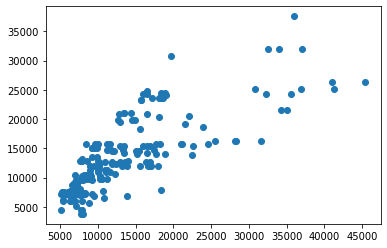

In [26]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
plt.scatter(y_data,yhat.reshape(-1,1))

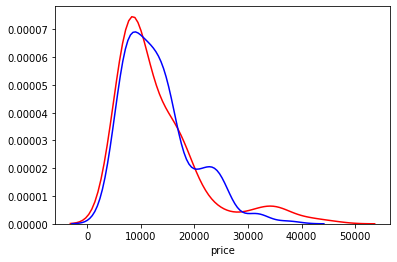

In [27]:
# Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
# DistributionPlot(y_data,yhat.reshape(-1,1), "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.distplot(y_data,color='red',hist=False)
sns.distplot(yhat,color='blue',hist=False)

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

Overfitting
Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

Underfitting
In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

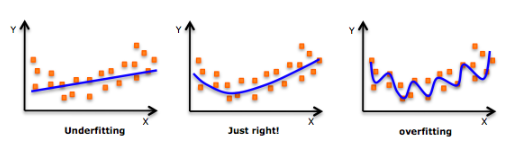

Let's create Multiple linear regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.

In [28]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediction using training data:

In [29]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

Prediction using test data: 

In [30]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

Let's perform some model evaluation using our training and testing data separately. First  we import the seaborn and matplotlibb library for plotting.

Let's examine the distribution of the predicted values of the training data.

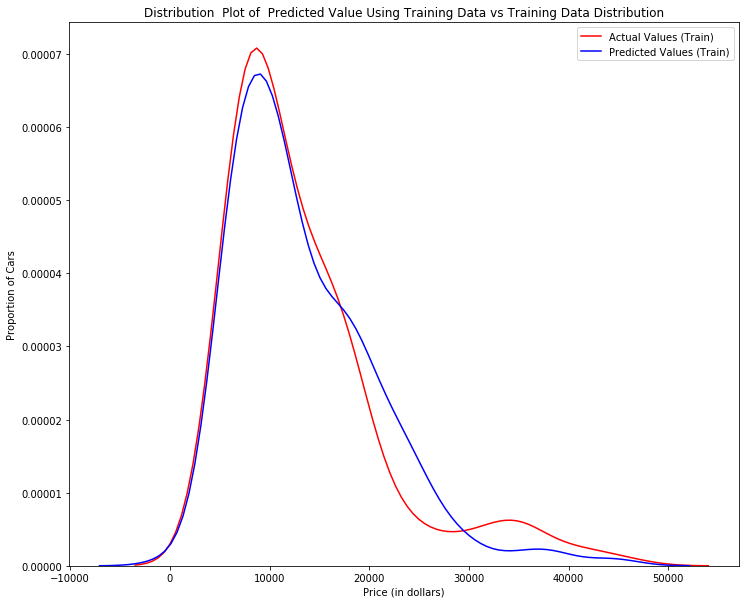

In [31]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 

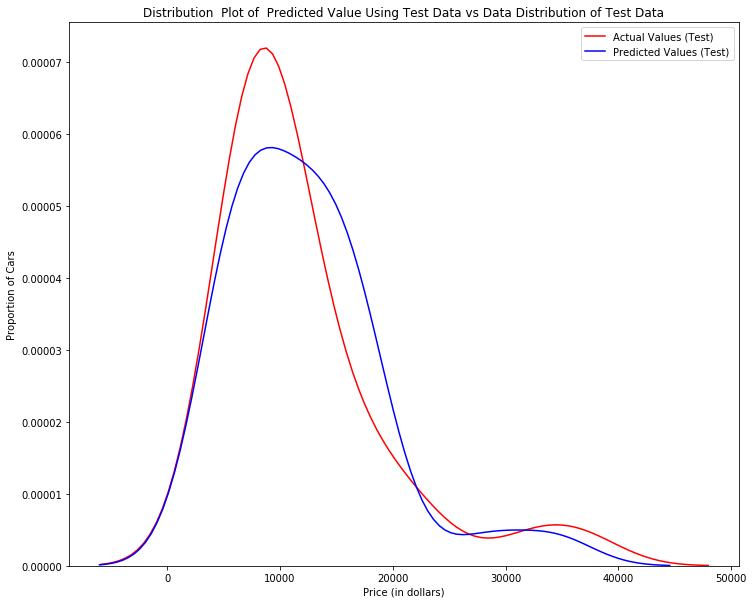

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 

<p>Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

In [33]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

Let's use 55 percent of the data for testing and the rest for training:

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horse power'</b>. 

In [35]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

Now let's create a linear regression model "poly" and train it.

In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can see the output of our model using the method  "predict." then assign the values to "yhat".

In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

Let's take the first five predicted values and compare it to the actual targets. 

In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

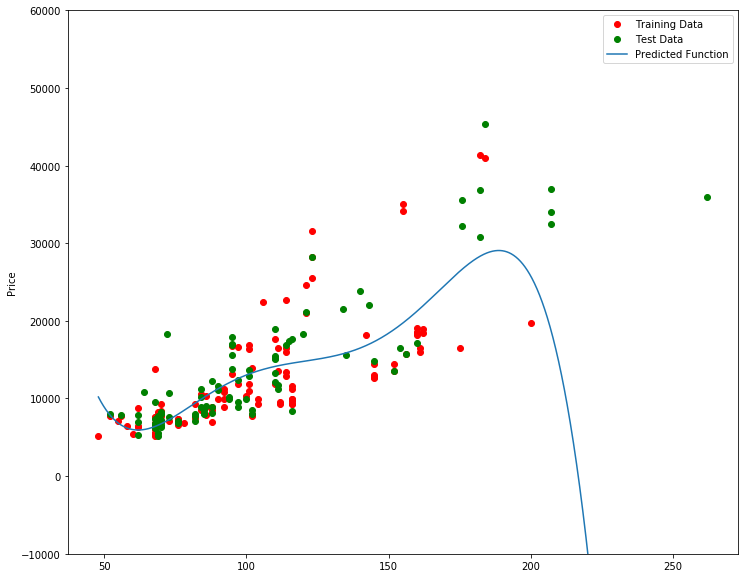

In [39]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 R^2 of the training data:

In [40]:
poly.score(x_train_pr, y_train)

0.5567716902121584

 R^2 of the test data:

In [41]:
poly.score(x_test_pr, y_test)

-29.871340540625308

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

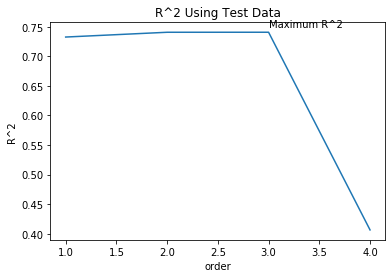

In [42]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

The following function will be used in the next section; please run the cell.

In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

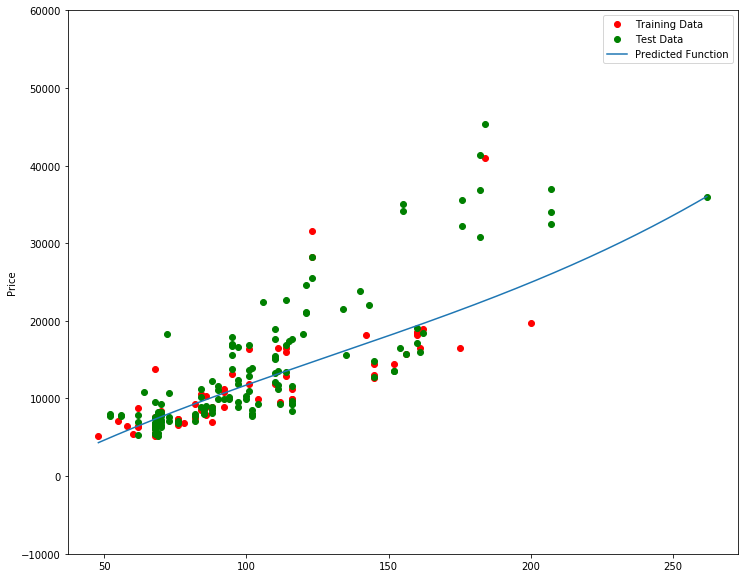

In [44]:
f(3,.7)

The following interface allows you to experiment with different polynomial orders and different amounts of data. 

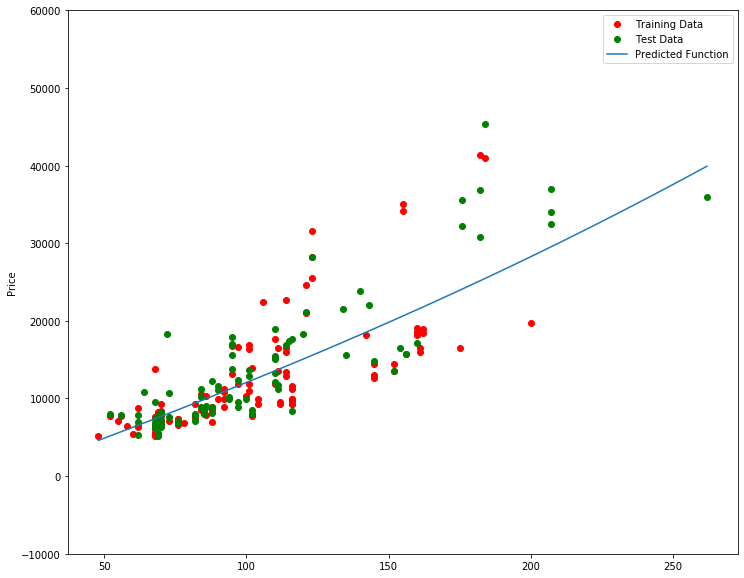

<function __main__.f(order, test_data)>

In [45]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two?</b>
</div>

In [46]:
pr1=PolynomialFeatures(degree=2)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

pr1=PolynomialFeatures(degree=2)

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform" 
?</b>
</div>

In [47]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])

Double-click <b>here</b> for the solution.

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape"
</b>
</div>

In [48]:
x_train_pr1.shape[1]

15

Double-click <b>here</b> for the solution.

<!-- The answer is below:

There are now 15 features: x_train_pr1.shape 

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features?</b>
</div>

In [49]:
poly1=LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

poly1=linear_model.LinearRegression().fit(x_train_pr1,y_train)

-->

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot"  to display the distribution of the predicted output vs the test data?</b>
</div>

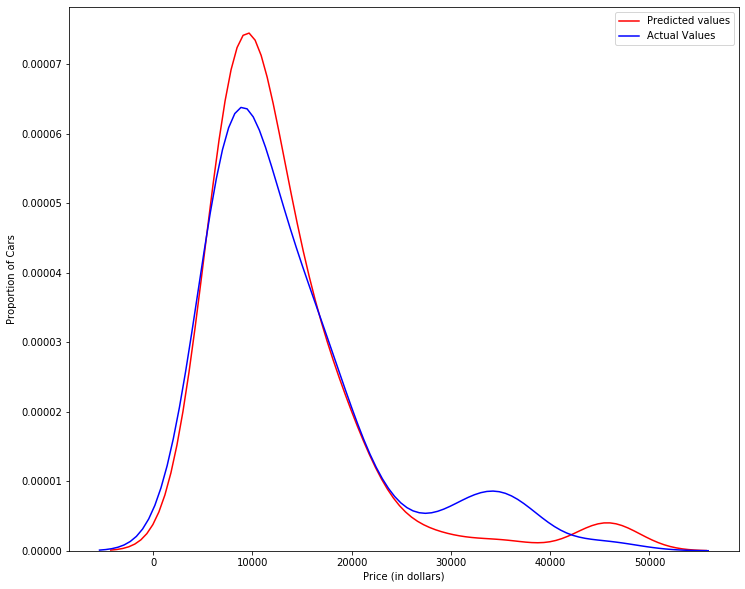

In [50]:
yhat_test1=poly1.predict(x_test_pr1)
DistributionPlot(yhat_test1,y_test,'Predicted values','Actual Values','')

Double-click <b>here</b> for the solution.

<!-- The answer is below:

yhat_test1=poly1.predict(x_train_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Use the distribution plot to determine the two regions were the predicted prices are less accurate than the actual prices.</b>
</div>

Double-click <b>here</b> for the solution.

<!-- The answer is below:

The predicted value is lower than actual value for cars where the price  $ 10,000 range, conversely the predicted price is larger than the price cost in the $30, 000 to $40,000 range. As such the model is not as accurate in these ranges .
    
-->

<img src = "https://ibm.box.com/shared/static/c35ipv9zeanu7ynsnppb8gjo2re5ugeg.png" width = 700, align = "center">


<h2 id="ref3">Part 3: Ridge regression</h2> 

###  Ridge  

Bias- inability for a machin learnikng method to capture the TRUE relationship is called bias  
IF fits good the trainning set then the algo have very low bias  
Variance- Fits better the test set
An ideal algorithm has low bias and can accurately model the true relationship and low variability by producing consistent predictions across different datasets   
Find the sweet spot between a simple and complicate model by: regularization, boosting and bagging  
If an algo fits well the trainning set, but no the testing, we say that it is overfit  

We introduce a small amount of Bias into how the new line is fit to the data  but in return for that small amount of bias we get a significant drop in variance.By starting with a slightly worse fit, ridge regression can provide better long term predictions.  

Minimizes $the$ $sum$ $of$ $the$ $squared$ $residuals + \lambda^{2}*(slope)^{2}$ where $(slope)^{2}$ adds a penalty to the traditional lest squiare method and $\lambda$ determines how severe the penalty is.  
$0< \lambda < \infty$ the larger we make $\lambda$ the slope gets asymptotically close to 0  
How we decide the value of $\lambda$ ? we try a bunch of values for $\lambda$ and use cross validation, typically 10 fold cross validation, to determine wich one results in the lowest variance  
Ridge regression can be applied to Logistic Regression  **RidgeClassifier** and **RidgeClassifierCV**  
The ridge regression penalty contains all the parameters to the power of 2 multiplied by $\lambda$ 

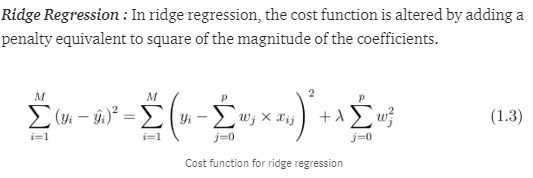

###  https://www.youtube.com/watch?v=Q81RR3yKn30    

### https://www.statisticshowto.datasciencecentral.com/ridge-regression/

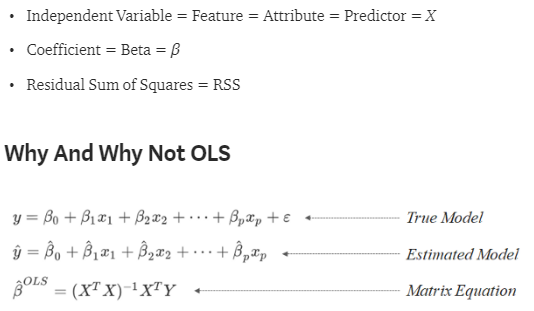  
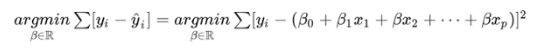  
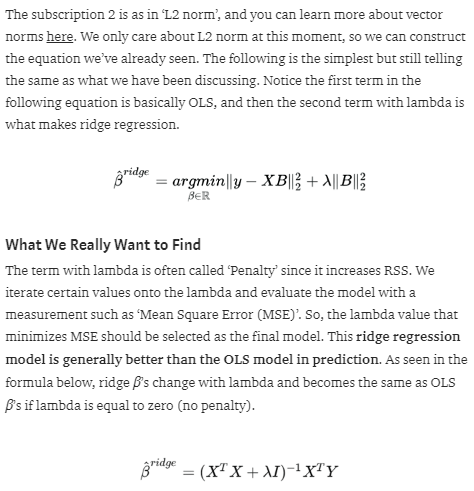

###  Lasso  

shrink- encoger, converge a.  
Instead of squaring the slope, we take the absolute value as in Ridge regression $\lambda$ is determine by CV  
The lasso regression penalty contains all of the estimated parameters except for the y intercept  
Difference between lasso and ridge, Lasso as $\lambda$ increase the value, the slope gets smaller until the slope=0 different think with Ridge that as $\lambda$ increase, the slope shrink asymptotically to 0.  
In Ridge regression as $\lambda$ gest larger the important parameters for the prediction might shrink a little bit and the not so important parameters might shrink a lot, but never be equial to 0, in contrast in Lasso Regression as we increase $\lambda$, the important parameters might shrink a little, and not important parameters will go all the way to 0 so the parameters will be elminated, this is a way to excludes all the silly stuff, i.e, not relevant parameters for the prediction, leaving us with the important ones.  
Since Lasso Regression can exclude useless variables from equations, it is a little bertter than Ridge at reducing the variance in models that contain a lot of usless variables.   
Ridge Regression tends to be better when most variables are useul.

###  https://www.youtube.com/watch?v=NGf0voTMlcs  

### https://www.statisticshowto.datasciencecentral.com/lasso-regression/

 In this section, we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.

 Let's perform a degree two polynomial transformation on our data. 

In [51]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

 Let's import  <b>Ridge</b>  from the module <b>linear models</b>.

In [52]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter to 0.1 

In [53]:
RigeModel=Ridge(alpha=0.001)

Like regular regression, you can fit the model using the method <b>fit</b>.

In [54]:
RigeModel.fit(x_train_pr, y_train)

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-18): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

 Similarly, you can obtain a prediction: 

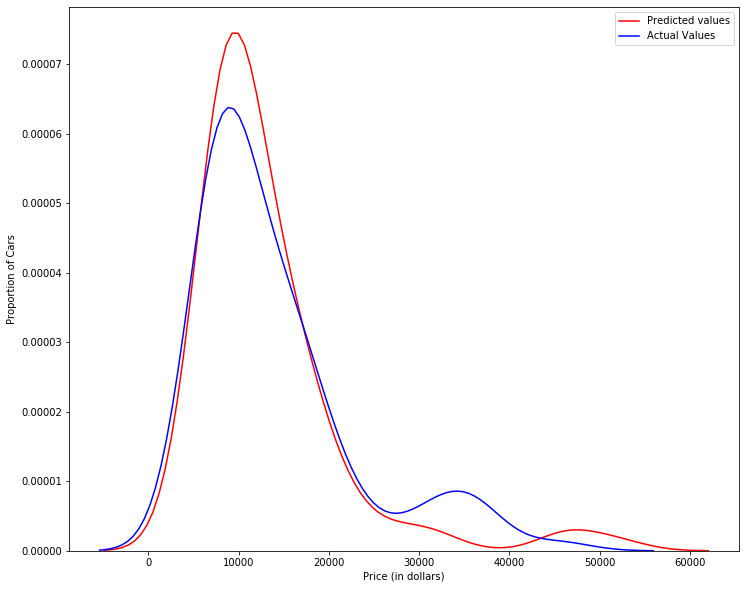

In [55]:
yhat = RigeModel.predict(x_test_pr)

DistributionPlot(yhat,y_test,'Predicted values','Actual Values','')

Let's compare the first five predicted samples to our test set 

In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.03815936  9571.40849098 20776.09804611 19334.35422873]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of Alfa that minimizes the test error, for example, we can use a for loop. 

In [57]:
from sklearn.linear_model import RidgeCV
RidgeCV=RidgeCV(alphas=np.arange(0,2,.01),cv=10,normalize=True)
RidgeCV.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
RidgeCV.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8064529009748252

In [58]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = np.arange(0,1,.001)
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05943e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.08915e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11886e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14858e-18): result may not be accurat

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.94264e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.04561e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14858e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.25155e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.35452e-17): result may not be accurat

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.37042e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.47339e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.57636e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.67933e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.7823e-17): result may not be accurate

In [59]:
aux=pd.DataFrame({'ALFA':ALFA,'Rsqu_test':Rsqu_test,'Rsqu_train':Rsqu_train}).set_index('ALFA')
aux.Rsqu_test.nlargest(5)

ALFA
0.999    0.533425
0.998    0.533422
0.997    0.533419
0.996    0.533416
0.995    0.533413
Name: Rsqu_test, dtype: float64

We can plot out the value of R^2 for different Alphas 

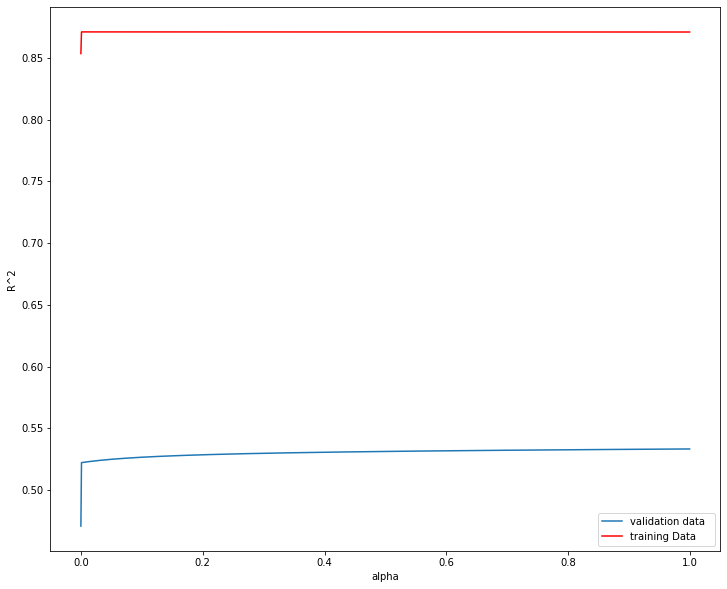

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 6:The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa 

The red line in figure 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to  10.
</div>

In [61]:
# Write your code below and press Shift+Enter to execute 
pr1=PolynomialFeatures(degree=3)
x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
RidgeModel1=Ridge(alpha=10)
RidgeModel1.fit(x_train_pr1,y_train)
yhat1=RidgeModel1.predict(x_test_pr1)

In [62]:
print(RidgeModel1.score(x_train_pr1,y_train))
RidgeModel1.score(x_test_pr1,y_test)

0.8706524475732117


0.5418576440207616

Double-click <b>here</b> for the solution.

<!-- The answer is below:

RigeModel = Ridge(alpha=0) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

-->

<h2 id="ref4">Part 4: Grid Search</h2>  

### https://scikit-learn.org/stable/modules/grid_search.html#grid-search  

### https://www.analyticslane.com/2018/07/02/gridsearchcv/

To identify the best combination of parameter values for the model, I used GridSearchCV. It’s a method provided by the sklearn library which allows us to define a set of possible values we wish to try for the given model and it trains on the data and identifies the best estimator from a combination of parameter values.  
scikit-learn dispone de varias clases que implementan la metodología de la validación cruzada. En el caso de que se desee utilizar para seleccionar los parámetros de entrenamiento de un modelo una de las opciones es GridSearchCV. Siendo uno de los más simples y fáciles de utilizar. El constructor de esta clase se ha de llamar indicándole la instancia de un modelo, los valores a probar y el número de conjuntos en el que se dividen los datos. Esto se realiza mediante los siguientes parámetros:  
  estimator: el modelo que se ha de evaluar  
param_grid: un diccionario en que se indicar los parámetros a evaluar como clave y el conjunto elementos como valor  
cv: el número de conjuntos en los que se divide los datos para la validación cruzada.  

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.

In [63]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:

In [64]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a ridge regions object:

In [65]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Create a ridge grid search object 

In [66]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model 

In [67]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [68]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

 We now test our model on the test data 

In [69]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters
</div>

In [70]:
# Write your code below and press Shift+Enter to execute 
parameters2=[{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000],'normalize':['True','False']}]
Grid2=GridSearchCV(RR,parameters2,cv=5)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000],
                          'normalize': ['True', 'False']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
Grid2.cv_results_

{'mean_fit_time': array([0.02080503, 0.00720043, 0.0064002 , 0.0064003 , 0.00480056,
        0.01119838, 0.01679873, 0.00639787, 0.00399876, 0.00400004,
        0.00559974, 0.01039209, 0.01039944, 0.0072001 , 0.00640016,
        0.00880036, 0.00639911, 0.01361008]),
 'std_fit_time': array([2.03064590e-02, 1.59976651e-03, 1.95980103e-03, 3.19985179e-03,
        2.99324921e-03, 4.66624831e-03, 6.39868135e-03, 1.95964631e-03,
        3.18804067e-06, 2.53069461e-03, 1.96011228e-03, 4.08438536e-03,
        4.80222083e-03, 2.99410309e-03, 1.96024814e-03, 2.99373392e-03,
        1.95997640e-03, 4.79307779e-03]),
 'mean_score_time': array([0.00799189, 0.00319924, 0.00320039, 0.00239959, 0.00159993,
        0.00319667, 0.00800118, 0.00079985, 0.00320048, 0.0016005 ,
        0.00240016, 0.00559869, 0.00720086, 0.00399942, 0.00479999,
        0.00480065, 0.00079961, 0.00639009]),
 'std_score_time': array([6.19395834e-03, 1.59962438e-03, 1.60019463e-03, 1.95925527e-03,
        1.95950820e-03, 1.59

In [72]:
BestRR2=Grid2.best_estimator_
BestRR2

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize='True',
      random_state=None, solver='auto', tol=0.001)

In [74]:
BestRR2.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7688497506498384

Double-click <b>here</b> for the solution.

<!-- The answer is below:

parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

-->

<h1>Thank you for completing this notebook!</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">

    <p><a href="https://cocl.us/DA0101EN_NotbookLink_Top_bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/BottomAd.png" width="750" align="center"></a></p>
</div>

<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> and <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.</p>

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>